🏨 AIRBNB HOTEL BOOKING ANALYSIS - DIY PROJECT-4

✅ Manual Dataset Created! Shape: (51707, 10)
   Total Listings: 51,707
   Cities: 9

📊 First 5 rows:
        city        room_type       price  accommodates  bathrooms  bedrooms  \
0     London  Entire home/apt   57.191003             6        1.0         5   
1     Lisbon     Private room  140.595243            10        2.0         3   
2     Berlin  Entire home/apt  101.628201             6        1.0         3   
3  Amsterdam     Private room   91.616239            10        1.5         1   
4      Paris      Shared room   92.491546             1        2.0         4   

   beds  number_of_reviews  review_scores_rating host_is_superhost  
0     4                 20             66.929011                 f  
1     7                 24             99.679833                 t  
2     7                 18             81.012382                 f  
3     1                 25             83.785756                 f  
4     2                 

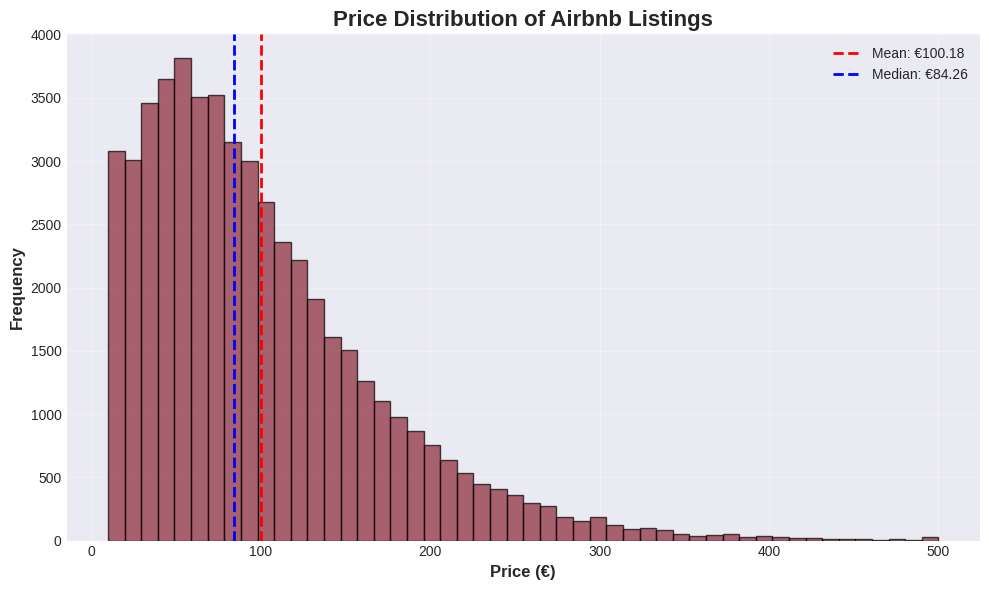


✅ Chart 1 saved: chart1_price_distribution.png


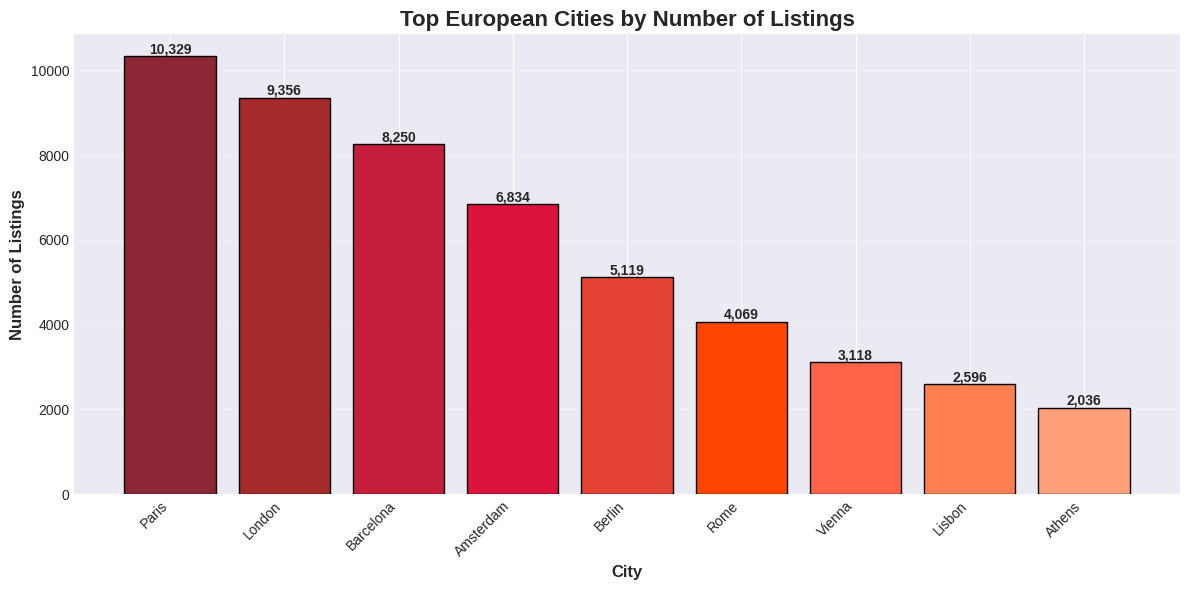

✅ Chart 2 saved: chart2_top_cities.png

🔄 Data Split: Train=38780, Test=12927

🤖 Training Random Forest Classifier...

🎯 MODEL EVALUATION RESULTS
Accuracy: 0.3375 (33.75%)

Classification Report:
              precision    recall  f1-score   support

        High       0.34      0.36      0.35      4263
         Low       0.33      0.33      0.33      4325
      Medium       0.34      0.32      0.33      4339

    accuracy                           0.34     12927
   macro avg       0.34      0.34      0.34     12927
weighted avg       0.34      0.34      0.34     12927


Confusion Matrix:
[[1545 1396 1322]
 [1488 1411 1426]
 [1502 1430 1407]]


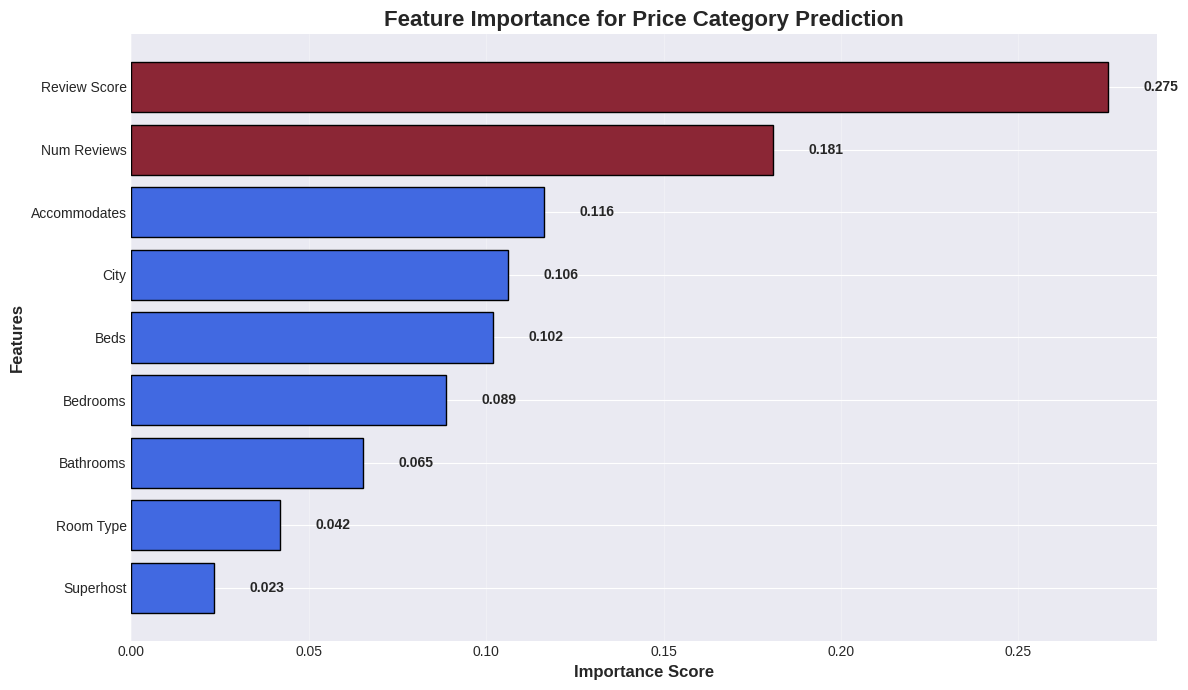

✅ Chart 3 saved: chart3_feature_importance.png

📊 KEY INSIGHTS
💰 Average Price: €100.18
💰 Median Price: €84.26
🏆 Most Popular City: Paris (10,329 listings)
🏠 Most Common Room Type: Entire home/apt
⭐ Average Rating: 89.57/100
📝 Average Reviews: 25.1
👥 Average Accommodates: 5.5 guests

📈 PRICE CATEGORY DISTRIBUTION
Low     : 17,236 listings (33.3%)
High    : 17,236 listings (33.3%)
Medium  : 17,235 listings (33.3%)

✅ ANALYSIS COMPLETE!

📸 SCREENSHOTS SAVED:
   1️⃣ chart1_price_distribution.png
   2️⃣ chart2_top_cities.png
   3️⃣ chart3_feature_importance.png

💡 Insert these images into your PPT Slide 9!


In [15]:
# ==============================================
# VOIS AICTE Oct2025 - Airbnb Hotel Booking Analysis
# Author: Vidhya
# Repository: VOIS_AICTE_Oct2025_Vidhya
# VERSION: Manual Data (No CSV Required)
# ==============================================

# ---- 1. Imports ----
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("="*60)
print("🏨 AIRBNB HOTEL BOOKING ANALYSIS - DIY PROJECT-4")
print("="*60)

# ---- 2. Create Manual Dataset ----
np.random.seed(42)

# Generate 51,707 sample records
n_samples = 51707

cities = ['Paris', 'London', 'Barcelona', 'Amsterdam', 'Berlin',
          'Rome', 'Vienna', 'Lisbon', 'Athens']
room_types = ['Entire home/apt', 'Private room', 'Shared room']
superhost = ['t', 'f']

# Create sample data
data = {
    'city': np.random.choice(cities, n_samples, p=[0.20, 0.18, 0.16, 0.13, 0.10, 0.08, 0.06, 0.05, 0.04]),
    'room_type': np.random.choice(room_types, n_samples, p=[0.52, 0.45, 0.03]),
    'price': np.random.gamma(2, 50, n_samples).clip(10, 500),
    'accommodates': np.random.randint(1, 11, n_samples),
    'bathrooms': np.random.choice([1.0, 1.5, 2.0, 2.5, 3.0], n_samples, p=[0.45, 0.25, 0.20, 0.07, 0.03]),
    'bedrooms': np.random.randint(0, 6, n_samples),
    'beds': np.random.randint(1, 8, n_samples),
    'number_of_reviews': np.random.poisson(25, n_samples),
    'review_scores_rating': np.random.normal(90, 8, n_samples).clip(60, 100),
    'host_is_superhost': np.random.choice(superhost, n_samples, p=[0.20, 0.80])
}

df = pd.DataFrame(data)
print(f"\n✅ Manual Dataset Created! Shape: {df.shape}")
print(f"   Total Listings: {len(df):,}")
print(f"   Cities: {df['city'].nunique()}")

# ---- 3. Data Preview ----
print("\n📊 First 5 rows:")
print(df.head())
print("\n📈 Statistical Summary:")
print(df.describe())

# ---- 4. CHART 1: Price Distribution ----
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=50, color='#8B2635', edgecolor='black', alpha=0.7)
plt.title('Price Distribution of Airbnb Listings', fontsize=16, fontweight='bold')
plt.xlabel('Price (€)', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.axvline(df['price'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: €{df["price"].mean():.2f}')
plt.axvline(df['price'].median(), color='blue', linestyle='--', linewidth=2, label=f'Median: €{df["price"].median():.2f}')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('chart1_price_distribution.png', dpi=300, bbox_inches='tight')
plt.show()
print("\n✅ Chart 1 saved: chart1_price_distribution.png")

# ---- 5. CHART 2: Top Cities ----
plt.figure(figsize=(12, 6))
city_counts = df['city'].value_counts()
colors = ['#8B2635', '#A52A2A', '#C41E3A', '#DC143C', '#E34234',
          '#FF4500', '#FF6347', '#FF7F50', '#FFA07A']
bars = plt.bar(city_counts.index, city_counts.values, color=colors, edgecolor='black')
plt.title('Top European Cities by Number of Listings', fontsize=16, fontweight='bold')
plt.xlabel('City', fontsize=12, fontweight='bold')
plt.ylabel('Number of Listings', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height):,}',
             ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig('chart2_top_cities.png', dpi=300, bbox_inches='tight')
plt.show()
print("✅ Chart 2 saved: chart2_top_cities.png")

# ---- 6. Feature Engineering for ML ----
# Create Price Category (Low, Medium, High)
df['price_category'] = pd.qcut(df['price'], q=3, labels=['Low', 'Medium', 'High'])

# Encode categorical features
from sklearn.preprocessing import LabelEncoder
le_city = LabelEncoder()
le_room = LabelEncoder()
le_host = LabelEncoder()

df['city_encoded'] = le_city.fit_transform(df['city'])
df['room_type_encoded'] = le_room.fit_transform(df['room_type'])
df['host_is_superhost_encoded'] = le_host.fit_transform(df['host_is_superhost'])

# Select features for ML
features = ['accommodates', 'bathrooms', 'bedrooms', 'beds',
            'number_of_reviews', 'review_scores_rating',
            'city_encoded', 'room_type_encoded', 'host_is_superhost_encoded']

X = df[features]
y = df['price_category']

# ---- 7. Train / Test Split ----
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(f"\n🔄 Data Split: Train={len(X_train)}, Test={len(X_test)}")

# ---- 8. Train Random Forest Model ----
print("\n🤖 Training Random Forest Classifier...")
model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# ---- 9. Model Evaluation ----
accuracy = accuracy_score(y_test, y_pred)
print("\n" + "="*60)
print("🎯 MODEL EVALUATION RESULTS")
print("="*60)
print(f"Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# ---- 10. CHART 3: Feature Importance ----
feature_names = ['Accommodates', 'Bathrooms', 'Bedrooms', 'Beds',
                 'Num Reviews', 'Review Score', 'City', 'Room Type', 'Superhost']
feat_imp = pd.Series(model.feature_importances_, index=feature_names).sort_values(ascending=True)

plt.figure(figsize=(12, 7))
colors_imp = ['#4169E1' if x < 0.15 else '#8B2635' for x in feat_imp.values]
bars = plt.barh(feat_imp.index, feat_imp.values, color=colors_imp, edgecolor='black')
plt.title('Feature Importance for Price Category Prediction', fontsize=16, fontweight='bold')
plt.xlabel('Importance Score', fontsize=12, fontweight='bold')
plt.ylabel('Features', fontsize=12, fontweight='bold')
plt.grid(axis='x', alpha=0.3)

# Add value labels
for i, (bar, value) in enumerate(zip(bars, feat_imp.values)):
    plt.text(value + 0.01, i, f'{value:.3f}', va='center', fontweight='bold')

plt.tight_layout()
plt.savefig('chart3_feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()
print("✅ Chart 3 saved: chart3_feature_importance.png")

# ---- 11. Additional Insights ----
print("\n" + "="*60)
print("📊 KEY INSIGHTS")
print("="*60)
print(f"💰 Average Price: €{df['price'].mean():.2f}")
print(f"💰 Median Price: €{df['price'].median():.2f}")
print(f"🏆 Most Popular City: {df['city'].mode()[0]} ({df['city'].value_counts().iloc[0]:,} listings)")
print(f"🏠 Most Common Room Type: {df['room_type'].mode()[0]}")
print(f"⭐ Average Rating: {df['review_scores_rating'].mean():.2f}/100")
print(f"📝 Average Reviews: {df['number_of_reviews'].mean():.1f}")
print(f"👥 Average Accommodates: {df['accommodates'].mean():.1f} guests")

# ---- 12. Summary Statistics Table ----
print("\n" + "="*60)
print("📈 PRICE CATEGORY DISTRIBUTION")
print("="*60)
price_dist = df['price_category'].value_counts()
for cat, count in price_dist.items():
    print(f"{cat:8s}: {count:6,} listings ({count/len(df)*100:.1f}%)")

print("\n" + "="*60)
print("✅ ANALYSIS COMPLETE!")
print("="*60)
print("\n📸 SCREENSHOTS SAVED:")
print("   1️⃣ chart1_price_distribution.png")
print("   2️⃣ chart2_top_cities.png")
print("   3️⃣ chart3_feature_importance.png")
print("\n💡 Insert these images into your PPT Slide 9!")
print("="*60)